In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from textblob import TextBlob

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

stop = stopwords.words('English')

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [3]:
stop = stopwords.words('English')

In [4]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [89]:
sample = 'This is a test again I think it works'

In [5]:
comm = pd.read_csv('Sunscreen_Comments_Full.csv').iloc[:, 1:]
comm.Comment = comm.Comment.apply(lambda x: str(x)[1:-1])

In [6]:
comm.Comment = comm.Comment.apply(lambda x: str(x)[1:-1])

In [7]:
from nltk.probability import FreqDist
freqdist = FreqDist()

In [8]:
from nltk.stem import WordNetLemmatizer
lemmatize = WordNetLemmatizer()

In [147]:
comments = ' '.join(words)
t = TextBlob(comments)

0.0

In [33]:
import pandas as pd
import numpy as np
import nltk
import re

# from textblob import TextBlob

from nltk.probability import FreqDist
freqdist = FreqDist()

from nltk.stem import WordNetLemmatizer
lemmatize = WordNetLemmatizer()

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

stop = stopwords.words('English')
from langdetect import detect
comm = pd.read_csv('Sunscreen_Comments_Full.csv').iloc[:, 1:]
comm.Comment = comm.Comment.apply(lambda x: str(x)[1:-1])

In [ ]:
count = 0
for comment in comm['Comment'][:20]: 
    try: 
        if detect(comment) == 'en':
            sample = comment.lower().split()
            words = [w for w in sample if w not in stop]
            words = word_tokenize(' '.join(words))
            words = [w for w in words if w not in stop]
            words = [re.sub('[^A-Za-z0-9]+', '', w) for w in words]
            words = [w for w in words if w]
            single_words = [lemmatize.lemmatize(w, pos = 'v') for w in words]
    #     TextBlob(words).detect_language()
    #     Need to filter outer comment by language 
            for w in single_words: 
                freqdist[w] += 1
            
            bi

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


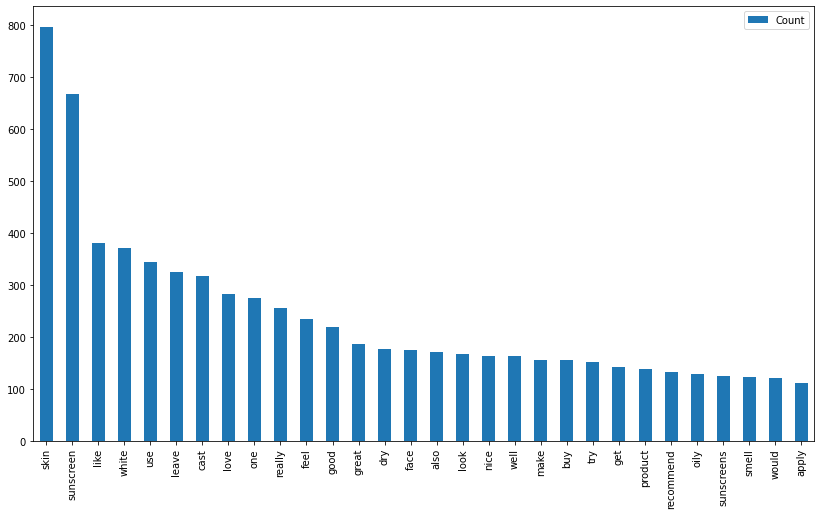

In [37]:
count = 0
for comment in comm['Comment'][:1000]: 
    try: 
        if detect(comment) == 'en':
            sample = comment.lower().split()
            words = [w for w in sample if w not in stop]
            words = word_tokenize(' '.join(words))
            words = [w for w in words if w not in stop]
            words = [re.sub('[^A-Za-z0-9]+', '', w) for w in words]
            words = [w for w in words if w]
            single_words = [lemmatize.lemmatize(w, pos = 'v') for w in words]
    #     TextBlob(words).detect_language()
    #     Need to filter outer comment by language 
            for w in single_words: 
                freqdist[w] += 1
            
            bidist = FreqDist()
            for bi in nltk.bigrams(words): 
                bidist[bi] += 1
                
            tridist = FreqDist()
            for tri in nltk.trigrams(words): 
                tridisti[tri] += 1
    except: 
        continue
    finally: 
        count += 1
        print(count)
    
        
c_df = pd.DataFrame.from_dict(freqdist, orient='index')
c_df.columns = ['Count']
%matplotlib inline
c_df.sort_values('Count', ascending=False).head(30).plot(kind = 'bar', figsize = [14, 8]);

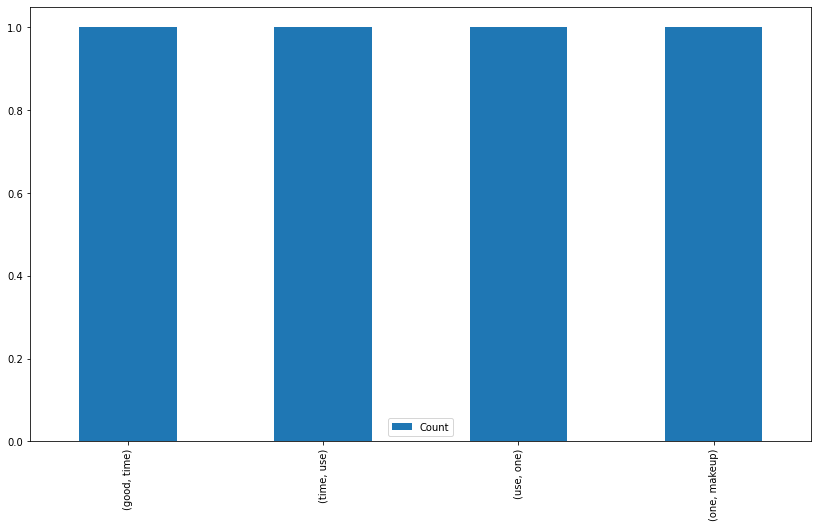

In [38]:
c_df = pd.DataFrame.from_dict(bidist, orient='index')
c_df.columns = ['Count']
%matplotlib inline
c_df.sort_values('Count', ascending=False).head(30).plot(kind = 'bar', figsize = [14, 8]);

In [8]:
# list(nltk.bigrams(comment))
# list(nltk.bigrams(words))
'-.5 = Negative'
'-1 = Very Negative'
'0 = Nuetral'
'.5 = Positive'
'1 = very positive'

def classify(polarity): 
    if polarity == 0: 
        return 'Neutral'
    elif polarity <= 1 and polarity > .5:
        return 'Very Postive'
    elif polarity <= .5 and polarity > 0: 
        return 'Positive'
    elif polarity < 0 and polarity >= -.5:
        return 'Negative'
    else: 
        return 'Very Negative'
# TextBlob("It's horrible").sentiment 

In [9]:
from textblob import TextBlob
import pandas as pd
from langdetect import detect

In [10]:
co = comm['Comment'][0]
from nltk.tokenize import word_tokenize, sent_tokenize

In [11]:
p = TextBlob(co).sentiment.polarity
p
# classify(p)

0.19940476190476192

In [15]:
from textblob import TextBlob
import pandas as pd
from langdetect import detect

def classify(polarity): 
    if polarity == 0: 
        return 'Neutral'
    elif polarity <= 1 and polarity > .5:
        return 'Very Postive'
    elif polarity <= .5 and polarity > 0: 
        return 'Positive'
    elif polarity < 0 and polarity >= -.5:
        return 'Negative'
    else: 
        return 'Very Negative'

comm = pd.read_csv('Sunscreen_Comments_Full.csv').iloc[:, 1:]
comm.Comment = comm.Comment.apply(lambda x: str(x)[1:-1])

desig = []
count = 0

for comment in comm['Comment']:
    try: 
        if detect(comment) == 'en':
            pol = TextBlob(comment).sentiment.polarity
            desig.append(classify(pol))
        else: 
            desig.append('Unknown')
    except: 
        desig.append('Unknown')
        continue
    finally: 
        count += 1
        print(count)
comm['Sentiment'] = desig

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064


3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716


5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382


6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042


8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703


10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
1032

11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
11653
11654
11655
11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
1169

12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
1307

14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
14404
14405
14406
14407
14408
14409
14410
14411
14412
14413
14414
14415
14416
14417
14418
14419
14420
14421
14422
14423
14424
14425
14426
14427
14428
14429
14430
14431
14432
14433
14434
14435
14436
14437
1443

15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
1581

17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
17149
17150
17151
17152
17153
17154
17155
17156
17157
17158
17159
17160
17161
17162
17163
17164
17165
17166
17167
17168
17169
17170
17171
17172
17173
17174
17175
17176
17177
17178
17179
17180
17181
17182
17183
17184
17185
17186
17187
17188
17189
17190
17191
17192
17193
17194
17195
17196
17197
17198
17199
17200
17201
17202
17203
17204
17205
17206
17207
17208
1720

18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18455
18456
18457
18458
18459
18460
18461
18462
18463
18464
18465
18466
18467
18468
18469
18470
18471
18472
18473
18474
18475
18476
18477
18478
18479
18480
18481
18482
18483
18484
18485
18486
18487
18488
18489
18490
18491
18492
18493
18494
18495
18496
18497
18498
18499
18500
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18524
18525
18526
18527
18528
18529
18530
18531
18532
18533
18534
18535
18536
18537
18538
18539
18540
18541
18542
18543
18544
18545
18546
18547
18548
18549
18550
18551
18552
18553
18554
18555
18556
18557
18558
18559
18560
18561
18562
18563
18564
18565
18566
18567
18568
18569
18570
18571
18572
18573
18574
18575
18576
18577
18578
18579
18580
18581
18582
18583
18584
18585
18586
18587
18588
18589
18590
18591
18592
18593
18594
18595
18596
18597
18598
1859

19824
19825
19826
19827
19828
19829
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
19846
19847
19848
19849
19850
19851
19852
19853
19854
19855
19856
19857
19858
19859
19860
19861
19862
19863
19864
19865
19866
19867
19868
19869
19870
19871
19872
19873
19874
19875
19876
19877
19878
19879
19880
19881
19882
19883
19884
19885
19886
19887
19888
19889
19890
19891
19892
19893
19894
19895
19896
19897
19898
19899
19900
19901
19902
19903
19904
19905
19906
19907
19908
19909
19910
19911
19912
19913
19914
19915
19916
19917
19918
19919
19920
19921
19922
19923
19924
19925
19926
19927
19928
19929
19930
19931
19932
19933
19934
19935
19936
19937
19938
19939
19940
19941
19942
19943
19944
19945
19946
19947
19948
19949
19950
19951
19952
19953
19954
19955
19956
19957
19958
19959
19960
19961
19962
19963
19964
19965
19966
19967
19968
19969
19970
19971
19972
19973
19974
19975
19976
19977
19978
19979
19980
19981
19982
19983
19984
19985
19986
19987
19988
19989
1999

21217
21218
21219
21220
21221
21222
21223
21224
21225
21226
21227
21228
21229
21230
21231
21232
21233
21234
21235
21236
21237
21238
21239
21240
21241
21242
21243
21244
21245
21246
21247
21248
21249
21250
21251
21252
21253
21254
21255
21256
21257
21258
21259
21260
21261
21262
21263
21264
21265
21266
21267
21268
21269
21270
21271
21272
21273
21274
21275
21276
21277
21278
21279
21280
21281
21282
21283
21284
21285
21286
21287
21288
21289
21290
21291
21292
21293
21294
21295
21296
21297
21298
21299
21300
21301
21302
21303
21304
21305
21306
21307
21308
21309
21310
21311
21312
21313
21314
21315
21316
21317
21318
21319
21320
21321
21322
21323
21324
21325
21326
21327
21328
21329
21330
21331
21332
21333
21334
21335
21336
21337
21338
21339
21340
21341
21342
21343
21344
21345
21346
21347
21348
21349
21350
21351
21352
21353
21354
21355
21356
21357
21358
21359
21360
21361
21362
21363
21364
21365
21366
21367
21368
21369
21370
21371
21372
21373
21374
21375
21376
21377
21378
21379
21380
21381
21382
2138

22595
22596
22597
22598
22599
22600
22601
22602
22603
22604
22605
22606
22607
22608
22609
22610
22611
22612
22613
22614
22615
22616
22617
22618
22619
22620
22621
22622
22623
22624
22625
22626
22627
22628
22629
22630
22631
22632
22633
22634
22635
22636
22637
22638
22639
22640
22641
22642
22643
22644
22645
22646
22647
22648
22649
22650
22651
22652
22653
22654
22655
22656
22657
22658
22659
22660
22661
22662
22663
22664
22665
22666
22667
22668
22669
22670
22671
22672
22673
22674
22675
22676
22677
22678
22679
22680
22681
22682
22683
22684
22685
22686
22687
22688
22689
22690
22691
22692
22693
22694
22695
22696
22697
22698
22699
22700
22701
22702
22703
22704
22705
22706
22707
22708
22709
22710
22711
22712
22713
22714
22715
22716
22717
22718
22719
22720
22721
22722
22723
22724
22725
22726
22727
22728
22729
22730
22731
22732
22733
22734
22735
22736
22737
22738
22739
22740
22741
22742
22743
22744
22745
22746
22747
22748
22749
22750
22751
22752
22753
22754
22755
22756
22757
22758
22759
22760
2276

In [16]:
desig

['Positive',
 'Positive',
 'Very Postive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Very Postive',
 'Positive',
 'Positive',
 'Neutral',
 'Very Postive',
 'Positive',
 'Positive',
 'Very Postive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Very Postive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Very Postive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Very Postive',
 'Neutral',
 'Positive',
 'Positive',
 'Very Postive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Very Postive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Very Postive',
 'Positive',
 'Positive',
 'Very Postive',
 'Positiv

In [17]:
from nltk.probability import FreqDist
new = FreqDist()
for d in desig: 
    new[d] += 1

In [26]:
(comm.iloc[86, 2])

"Feels nourishing and cooling on the skin. Moisturizing but, doesn't break me out, I have very sensitive skin but, it doesn't sting it doesn't contain any alcohol or fragrance which I like. It doesn't pill which is difficult to find."

In [20]:
comm[comm['Sentiment'] == 'Negative']

Product_ID                     Title  \
24     1058331261        Very tenacious SPF   
31     1058331261             new favorite!   
36     1058331261              bought three   
80     1058331261     Great Daily Sunscreen   
86     1058331261           Great sunscreen   
...           ...                       ...   
23186  1077952143      Don't like it at all   
23222  1069681454  Solid physical sunscreen   
23227  1069681454  Too thick and dries slow   
23229  1067423384                White cast   
23238  1076585440                   It's ok   

                                                 Comment                Date  \
24     It comes out as a thicker gel a slight yellow ...        July 6, 2020   
31     lightweight, absorbant, and moisturizing. i ha...   February 25, 2022   
36     Very hydrating, like the way it feels, i like ...   November 25, 2021   
80     My HG sunscreen in addition to the Canmake mer...       June 23, 2020   
86     Feels nourishing and cooling on the skin. Mois...      April 16, 2022   
...                                                  ...                 ...   
23186  This must be one of the worst sunscreens I use...        July 5, 2019   
23222  This one goes on very white but dries down wit...     August 15, 2020   
23227  No matter how much I squeeze out, the product ...       July 26, 2020   
23229  I am not impressed. Leaves a lot of white cast...        July 2, 2019   
23238  It gives a slight white cast, which I don't li...  September 28, 2021   

                                         Extra  Gender    Age  \
24     1 of 1 people found this review helpful     NaN    NaN   
31                                       False     NaN    NaN   
36                                       False     NaN    NaN   
80     0 of 1 people found this review helpful     NaN    NaN   
86                                       False  Female  25-29   
...                                        ...     ...    ...   
23186  0 of 1 people found this review helpful     NaN    NaN   
23222                                    False     NaN    NaN   
23227  1 of 1 people found this review helpful     NaN    NaN   
23229  0 of 1 people found this review helpful     NaN    NaN   
23238                                    False  Female  25-29   

              Skin_Tone    Skin_Type Country  Rating Sentiment  
24                  NaN          NaN     NaN   100.0  Negative  
31                  NaN          NaN     NaN   100.0  Negative  
36                  NaN          NaN     NaN   100.0  Negative  
80                  NaN          NaN     NaN   100.0  Negative  
86     Skin Tone: Light  Combination     NaN   100.0  Negative  
...                 ...          ...     ...     ...       ...  
23186               NaN          NaN     NaN    20.0  Negative  
23222               NaN          NaN     NaN    60.0  Negative  
23227               NaN          NaN     NaN    40.0  Negative  
23229               NaN          NaN     NaN    20.0  Negative  
23238  Skin Tone: Light  Combination     NaN    60.0  Negative  

[1329 rows x 12 columns]

In [5]:
comm['Sentiment'] = desig

In [31]:
import pandas as pd
comm.Sentiment.value_counts.plot(kind = 'bar')

AttributeError: 'function' object has no attribute 'plot'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


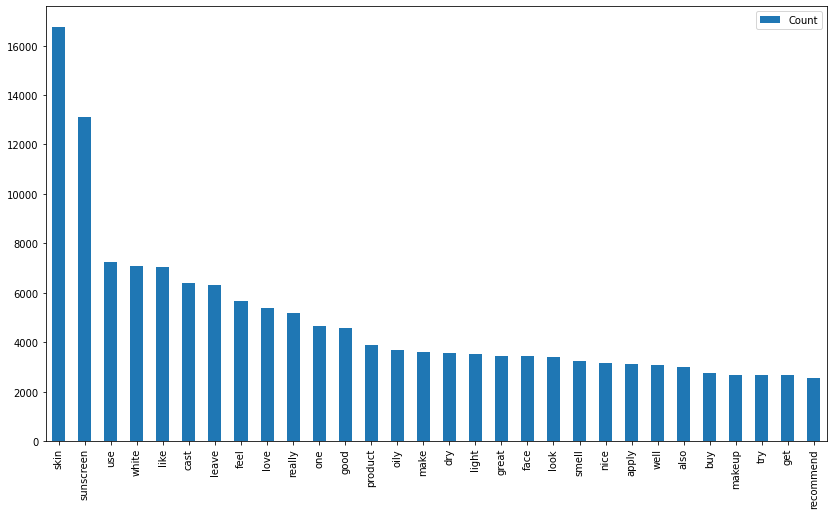

In [21]:
# Change to comm['Comment'][:2] for only a fraction of the comments, so it doesn't take forever to run. 
import matplotlib.pyplot as plt
count = 0
for comment in comm['Comment']: 
    try: 
        if detect(comment) == 'en':
            sample = comment.lower().split()
            words = [w for w in sample if w not in stop]
            words = word_tokenize(' '.join(words))
            words = [w for w in words if w not in stop]
            words = [re.sub('[^A-Za-z0-9]+', '', w) for w in words]
            words = [w for w in words if w]
            words = [lemmatize.lemmatize(w, pos = 'v') for w in words]
    #     TextBlob(words).detect_language()
    #     Need to filter outer comment by language 
            for w in words: 
                freqdist[w] += 1
                
            bigram_dist = FreqDist()
            f
    except: 
        continue
    finally: 
        count += 1
        print(count)
    
        
c_df = pd.DataFrame.from_dict(freqdist, orient='index')
c_df.columns = ['Count']
%matplotlib inline
c_df.sort_values('Count', ascending=False).head(30).plot(kind = 'bar', figsize = [14, 8])
plt.show();

In [38]:
print(freqdist.items())

dict_items([('buy', 2749), ('sunscreen', 13106), ('watch', 56), ('review', 451), ('youtube', 80), ('dr', 74), ('dray', 49), ('time', 1771), ('right', 341), ('need', 951), ('face', 3444), ('product', 3908), ('tick', 36), ('box', 79), ('come', 809), ('effective', 165), ('protection', 970), ('irritate', 919), ('skin', 16752), ('dry', 3547), ('white', 7098), ('cast', 6378), ('stickiness', 66), ('somewhat', 65), ('sensitive', 1718), ('fact', 162), ('deliver', 33), ('price', 1078), ('also', 2999), ('good', 4558), ('winwin', 3), ('wish', 421), ('bigger', 285), ('format', 11), ('totally', 159), ('recommend', 2570), ('bet', 9), ('favorite', 777), ('ever', 868), ('10', 90), ('already', 412), ('sweaty', 44), ('gal', 5), ('like', 7056), ('live', 268), ('humid', 144), ('city', 16), ('plus', 401), ('wear', 1519), ('mask', 121), ('8h', 2), ('day', 1515), ('best', 1628), ('friend', 125), ('real', 61), ('keep', 642), ('mind', 349), ('reapply', 574), ('minimum', 12), ('4', 116), ('fella', 3), ('ball', 7

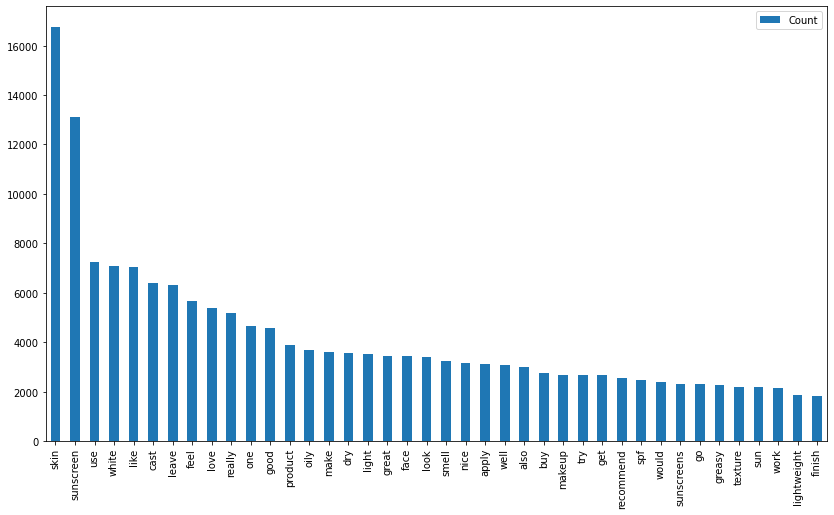

In [22]:
import matplotlib.pyplot as plt
c_df.sort_values('Count', ascending=False).head(40).plot(kind = 'bar', figsize = [14, 8])
plt.show();

In [23]:
# c_df.sort_values('Count', ascending=False).head(30).plot(kind = 'bar');
# c_df.sort_values('Count', ascending=False).head(20)

In [257]:
sample1 = comm['Comment'][0]
sample = sample1 + " doesn't"
sample = sample.lower().split()
words = [w for w in sample if w not in stop]
words = word_tokenize(' '.join(words))
words = [w for w in words if w not in stop]
words = [re.sub('[^A-Za-z0-9]+', '', w) for w in words]
words = [w for w in words if w]
words = [lemmatize.lemmatize(w, pos = 'v') for w in words]

In [258]:
words

['buy',
 'sunscreen',
 'watch',
 'review',
 'youtube',
 'dr',
 'dray',
 'time',
 'right',
 'need',
 'face',
 'sunscreen',
 'product',
 'tick',
 'box',
 'come',
 'sunscreen',
 'effective',
 'protection',
 'irritate',
 'skin',
 'dry',
 'skin',
 'white',
 'cast',
 'stickiness',
 'dry',
 'somewhat',
 'sensitive',
 'skin',
 'fact',
 'deliver',
 'price',
 'also',
 'good',
 'winwin',
 'wish',
 'come',
 'bigger',
 'format',
 'totally',
 'recommend']

In [181]:
lower_comment = comment.lower()
words = lower_comment.split()
words = [w for w in words if w not in stop]
reformat = ' '.join(words)
reformat

"très heureux, facile à utiliser tout en un et bonne teinte avec spf. durera aussi longtemps et j'aime le fait qu'il agisse également comme apprêt avec spf."

In [167]:
lower_comment = comment.lower()
words = lower_comment.split()
words = [w for w in words if w not in stop]
reformat = ' '.join(words)
words = word_tokenize(reformat)
# words = [re.sub('[^A-Za-z0-9]+', '', w) for w in words]
# words = [w for w in words if w]
# words = [lemmatize.lemmatize(w, pos = 'v') for w in words]

In [168]:
words

['très',
 'heureux',
 ',',
 'facile',
 'à',
 'utiliser',
 'tout',
 'en',
 'un',
 'et',
 'bonne',
 'teinte',
 'avec',
 'spf',
 '.',
 'durera',
 'aussi',
 'longtemps',
 'et',
 "j'aime",
 'le',
 'fait',
 "qu'il",
 'agisse',
 'également',
 'comme',
 'apprêt',
 'avec',
 'spf',
 '.']

In [151]:
c_df = pd.DataFrame.from_dict(freqdist, orient='index')

In [160]:
word_tokenize("Sunscreen's")

['Sunscreen', "'s"]

<AxesSubplot:>

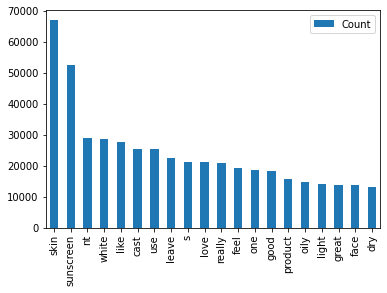

In [162]:
c_df.columns = ['Count']
%matplotlib inline
c_df.sort_values('Count', ascending=False).head(20).plot(kind = 'bar')

In [58]:
info = pd.read_csv('Product_Info_Sunscreen.csv')

Catalog No.                                            Product  \
0     1112141029               REYENA16 - Daily UV Defense Sun Milk   
1     1096470322                     SAM'U - PH Sensitive Sun Cream   
2     1063578220                         ACSEINE - UV Protection AC   
3     1105364416  Kose - Sekkisei Skincare UV Gel SPF 50+ PA++++...   
4     1106584439  THANK YOU FARMER - Sun Project Silky Calming S...   
..           ...                                                ...   
533   1105393496           Orbis - Body UV Protector SPF 50+ PA++++   
534   1103936289  Goodal - Houttuynia Cordata Calming Moisture S...   
535   1109485434                         KTW - Aqua Daily Sun Cream   
536   1060607201  The Saem - Eco Soul UV Sun Pact SPF50+ PA++++ ...   
537   1112637884  Shiseido - Anessa Perfect UV Sunscreen Skincar...   

    Imported Country                                         Other Info  \
0        South Korea  Translation reference for Korean beauty produc...   
1        South Korea  Translation reference for Korean beauty produc...   
2                NaN                                                NaN   
3                NaN                                                NaN   
4        South Korea                                                NaN   
..               ...                                                ...   
533              NaN                                                NaN   
534      South Korea                                                NaN   
535      South Korea  Translation reference for Korean beauty produc...   
536      South Korea                                                NaN   
537              NaN                                                NaN   

        Price                                        Ingredients      Made in  \
0    US$22.22  Purified Water, Cyclohexasiloxane, Zinc Oxide,...          NaN   
1    US$18.58  Water, Butylene Glycol, Alcohol, Ethylhexyl Sa...          NaN   
2    US$34.44  Cyclomethicone, water, titanium oxide, dimethi...        Japan   
3    US$39.49  Water, ethanol, ethylhexyl methoxycinnamate, P...        Japan   
4    US$39.49  Methyl Methacrylate Crosspolymer, Polyethylene...          NaN   
..        ...                                                ...          ...   
533  US$44.84  Water, ethylhexyl methoxycinnamate, BG, glycer...        Japan   
534  US$16.97  Water, Dibutyl Adipate, Propanediol, Polymethy...  South Korea   
535  US$15.86  Betula Platyphylla Japonica Juice, Water, Buty...          NaN   
536  US$17.47  Talc, Silica, Synthetic Fluorphlogopite, Zinc ...  South Korea   
537  US$40.60  Dimethicone, water, zinc oxide, ethanol, talc,...        Japan   

    Cruelty_free Vegan  Ranking_In_Best_Seller_List  
0            NaN   NaN                            1  
1            NaN   NaN                            2  
2            NaN   NaN                            3  
3            Yes   NaN                            4  
4            NaN   NaN                            5  
..           ...   ...                          ...  
533          NaN   NaN                          534  
534          Yes   NaN                          535  
535          NaN   NaN                          536  
536          NaN   NaN                          537  
537          NaN   NaN                          538  

[538 rows x 10 columns]

In [107]:
for inf in info.Ingredients: 
    print(inf.split(', '))

['Purified Water', 'Cyclohexasiloxane', 'Zinc Oxide', 'Butylene Glycol Dicaprylate/Dicaprate', 'Dicaprylyl Ether', 'Titanium Dioxide', 'Propanediol', 'Hamamelis Virginiana (Witch Hazel) Extract', 'Panthenol', 'Coccinia Indica Fruit Extract', 'Solanum Melongena (Eggplant) Fruit Extract', 'Curcuma Longa (Turmeric) Root Extract', 'Ocimum Sanctum Leaf Extract', 'Corallina Officinalis Extract', 'Fragaria Vesca Fruit Extract', 'Nymphaea Alba Flower Extract', 'Melia Azadirachta Leaf Extract', 'Melia Azadirachta Flower Extract', 'Methyl Methacrylate Crosspolymer', 'Stearic Acid', 'Aluminum Hydroxide', 'Trehalose', 'Polyglyceryl-3 Oleate', '1,2-Hexanediol', 'Polymethylsilsesquioxane', 'Caprylic/Capric Triglyceride', 'Polyglyceryl-3 Oleate', 'Ethylhexylglycerin,Diisostearoyl Polyglyceryl-3 Dimer Dilinoleate', 'Amber Powder (Pinus succinifera)', 'Moringa Oleifera Seed Oil', 'Polyglyceryl-4 Diisostearate/Polyhydroxystearate/Sebacate,Sodium Chloride', 'Calamine', 'Dipropylene Glycol', 'Tocopherol',

In [60]:
info.set_index('Catalog No.', inplace = True)
comm.set_index('Product_ID', inplace = True)

In [64]:
joined = comm.join(info)

Product_ID
1058331261    I bought this sunscreen after watching a revie...
Name: Comment, dtype: object

In [71]:
for comments in comm.Comment: 
    for word_tokenize

I bought this sunscreen after watching a review on youtube (Dr. Dray) and the timing was right for me (I needed a face sunscreen).  This product just ticks all the boxes for me, when it comes to sunscreen:', '- effective protection', '- not irritating for my skin', '- not drying for my skin', '- no white cast', '- no stickiness', 'I have dry and somewhat sensitive skin, so the fact that it delivers on all of the above AND that the price is also good is a win-win for me!  I just wish it came in a bigger format!  Totally recommend!
You bet this is my favorite sunscreen ever. I have bought more than 10 of this already. If you are a sweaty gal like me, living in a humid city plus wearing a mask 8h a day. This is your best friend for real. Keep in mind also that I reapply my sunscreen a minimum of 4 times a day. This fella doesn't ball up, and gives me a really cute fresh looking skin without looking like a grease ball and without any white cast. Also doesn't leave the skin sticky and doesn

very light and good ', 'most spf are oily and heavy but this is very light and watery. it also brightens the skin but in a very nice way and it has a lot of product for a good price 
Love this product. It has a lightweight formula which absorbs quickly. Perfect for primer or when i haven't applied any serum or face cream.
I like this sus cream because it has a high protection but is very light. And something important for me is that it doesn't smell
This product goes really well with the rest of my skincare routine in the morning when I’m about to go to work. It feels kinda thick once it’s out of the tube but not extremely and it doesn’t feel very heavy on my skin. It’s just the right balence. 
That's my first time I ordere this product and I love it! It doesn't feel very oily and shiny comparing to the other suncreams I used. The texture is very light and it feels moisturising. Great quality product!
It's a great product! It contains ingredients that are good for the skin, it doesn't 

Wow, this sunscreen really lives up to the hype! I have been trying to find the perfect SPF for almost a year now - no easy task since I need something that is both fungal acne safe and free from denatured alcohol (an insanely common sunscreen ingredient and one of my main migraine and eczema triggers).', "This not only fits the bill on both counts, but feels amazing on my skin - almost like a second moisturiser (wouldn't recommend wearing it without moisturiser though unless you're having an oily day). Also, this seems to be an unpopular opinion, but I actually like that it's in a jar instead of a tube - it makes it easier to use the whole thing, and if you're concerned about hygiene you can always apply it with, e.g., a skincare spatula.", "I really don't see myself buying any other sunscreen for a long time - highly recommend!
I used this for the first time this summer and it was great. It does what it says it does (I use it alone after cleansing my face, as toner, milk lotion, prim

I love this sunscreen so much, especially for summer, fragrance free, water proof and insanely lightweight but still hydrating. this does have alcohol in it but i have never found this to be drying even after reapplying multiple times throughout the day. love this so much! 
This is the perfect family sunscreen! Light consistency, dries immediately and doesn’t leave a residue. I have it near the door so when everybody leaves they just put this on. The pump is super convenient
I have combination skin, this spf cream has a milky light texture, it's hydrating enough for my skin to not use moisturiser in the morning and does not leave a white cast. Leaves a matte finish after 10 minutes. Great base for make up. Because it has alcohol you need to be careful to hydrate your skin every night to avoid dehydration. Also great price for the size of the bottle.", 'Super satisfied with this spf cream😊
I was looking for a sunscreen that could be used on face and body, have no fragrance, no white cas

I’ve used a few Korean sunscreens and so far I liked this one the most. Very hydrating and doesn’t leave a white cast or is very oily. My skin is vert sensitive and this didn’t leave me any spots or rashes. Really recommend it!
this is very light weight and smooth. really good for winter months when you still need a bit of glow. probably not during summer coz it becomes to shiny
i’ve been using this for quite some time now. it’s been really good giving my face a healthy glow and blur at the same time. the best part about this is that it is good for sensitive eyes. that’s a major factor for me coz I get very teary eyed if the sunscreen is wrong but this one has been really good and my go-to sunscreen.
One of my favourite suncreams to use. I'll definitely be getting again.
I love this sun screen, one of my favorites, I think that's my third bottle. It doesn't leave a white cast and it doesn't dry super matte, leaves a nice shiny, healthy layer. Will definitely buy another one
I love this

I have bought this sun stick when I was in korea and used it there I liked so much I bought more for family and friends but when I wanted to buy it again from the store in my country it was always sold out or very expensive so I have tried different sun sticks to replace it but nothing was like this one and thankfully I found it in this website with a reasonable price (bought during saless)
I tested various sunblocks of this type and this one is definitely my favorite. It doesn't leave a greasy feeling or white cast on my skin and it's really easy to reapply through the day.
Really nice sun balm 😎 Felt great on the skin! Moisturizing too
Carry this everyday to touch up my sunscreen. Sun screen in a stick is ingenious
this sunstick helps controlling oil and smoothing out my pores. however it doesn't meant to be used for reapplication. after swiping it on my face for the second time, it feels heavy. it's like my skin can not breathe, it's oily inside but dry outside. so i prefer using ot

I got #01 Pure and it's probably the best tone-up cream I've used. I have really dry skin so I appreciate how this doesn't really dry down to a semi-matte/matte finish. I would say the finish is more of a dewy 'glass skin' sort of look. The tone-up can be pretty intense if you have darker skin, but since I'm pretty pale, if just acts a natural brightener and colour corrector. It still clings a little to my really dry patches, but that's expected and it's not super noticeable either. Definitely will repurchase.
I’ve never used a tone up cream before and since I have oily skin I was thinking if it was okay to buy a glow tone up cream. I don’t regret at all, it’s really nice and it’s not an oily glow but a natural one so its good. Also, it’s great to create a non-makeup look.
i was skeptical when purchasing the glow tone up since i hadnt seen any reviews on it … but i do not regret it!!! makes me look so glowy
It's very nice texture and high SPF. 2 in 1. Perfect for everyday use. Not heav

I was looking for a high SPF sunscreen and wanted to try this one since it was so cheap. There’s a light smell to it but I kind of like it. However, it takes such a long time to rub into your skin and feels kind of heavy on the eyes.  Definitely not a terrible sunscreen for the price but I won’t be repurchasing
It's an ok sunscreen in terms of wearability and doesn't have a white cast, but I couldn't get past wearing it for a few hours because of the awful, heavy fragrance. It wouldn't have bothered me as much if it quickly dissipated like most sunscreen scents, but it never went away and I could continuously smell it the entire time I wore it. I'm sure it's fine for people who have no sensitivity to scent, but if you do have any, you probably won't like this.
This sunscreen smells very good but I’m not sure if fragrance is a good thing for my skin. Overall though it works.
The sunscreen feels very nice when applied to skin and does not leave any whitecast (I'm tanned South-East Asian)

First of all, I should mention that I'm really very pick when it comes to sunscreen creams. I have mature sensitive normal to dry skin. I bought the one in pink package. I loved this one. It glides on my skin, grate before make-up. Although it's mineral ss, it doesn't leave white layer at all. Smells so nice. Highl recommended. However, I should warn about something. I have medium color skin, tan in summers. Unfortunately, toning-up of this sunscreen didn't work for me. too light for me. I need to use something on it to be able catch my skin tone again after using this. Since I love the formula, I will give the blue moisturising one a try next time.
I've been looking for a sunscreen to incorporate into my skincare routine. I stumbled upon this one and decided to try it out. It works perfectly with the other products I use and doesn't have the scent of American sunscreen. Warning though, if you have drier skin then I would recommend buying the Daily Mild Sun Cream.
not gonna lie. first 

really lightweight, doesnt get oily or greasy.', 'also smells really nice, i recommend it 
I am an extremely oily person that has trouble finding a sunscreen that doesn't break me out. Have used it for 1 month with no issues. This sunscreen is super light, leaves no white cast. and absorbs super quickly. It feels like a moisturizer and layers under makeup well.
That’s my favourite face SPF! Has a gel/cream consistency which works great under the make up. Easy to absorb into the skin and has nice fresh scent. What the best about it that doesn’t irritate my eyes. Highly recommended
Like this brand very much all the time, coincidentally buy when discount, in order to gather together a sheet conveniently took a bottle of bask in, very water embellish, dry skin also do not be afraid,，，，，
This is the only face SPF I use now! Love this because it doesn’t make me feel oily or greasy at all and I’ve never noticed it irritating my skin. 
If you don't like fragrance in your products, do not get t

Well, sun cream and kbeauty had a lot of issues lately, and I fell victim to the klairs and purito chemical sun creams so I had the cosrx laying around for quite some time and used a western brand but I think it was around march/april that it was certain the aloe sun cream actually has the SPF50 and is save for use, so I started applying it on my face, and really I have no redness/little burns on my face from the sun, it's really protecting. Cream is easy to apply on the skin, has a nice smell, doesn't feel sticky and keeps my face moisturized. Oh yeah and no white cast left. So big yay...
I really liked this sunscreen super soft and makes your skin really smooth,shine and soft
I've been using this sunscreen since few months ago, and i really love the after effect after use this sunscreen. It have thick texture, but it doesn't leave any white cast. 
Although I have an acne-prone skin I love this emollient sunscreen. I use it instead of my moisturizer and it acts perfectly. Now, it's my

A really good sunscreen with great texture. It applies really well, and it doesn't leave a white-cast as some sunscreens usually do.", "My only problem with it is that when I got it, I checked the ingredient list, and found that it has fragrance and cyclopentasiloxane, which are two of the ingredients I've been told to stay away from. I'm not a skincare expert, so I don't know much. But if you're weary about the ingredients that goes into your skincare product, you might be a little cautious and google the ingredients of it.", '', 'But so far, the sunscreen has been good to me. :)
This is a great sunscreen that isn’t oily or greasy. this is great for oily skin. 
this is a nice light sunscreen. if you don't like the feeling of a super heavy/thick sunscreen, i would recommend this one or something with the same texture
this sun gel-cream is hydrating, light on the skin while also being tacky enough to use as a base for my makeup. 
I've not yet tried this out in summer, am spending a UK w

i loved this sunscreen, it didn’t last super long bc of its size but it’s felt awesome. it made my skin look matt and smooth, like a makeup primer
this sunscreen leaves no white cast and leaves a nice dewy finish after application.
I use the clear one and I can tell it's a good suncream because I don't put suncream on my body and it gets really tan compared to my face . I also love wearing this under makeup and when I'm not wearing makeup because it makes my face look plump and glowy 
I gave in to the hype of this sunscreen and I bought the clear version it felt so cooling on my skin great ingredients no fragrance or alcohol. The hype is real.
It feels so good to apply, I actually use it as my moisturizer in the day so it's like skipping a step every morning. It doesn't pill has, no white cast, and there's no weird scent. The only con is that it's a little small. 
This is probably the lightest 50spf sunscreen. Wears well under makeup
similar to the purito sunscreen that everyone loves.

I have combo oily skin and live in a very hot and humid climate. While this product does leave a white cast, I love everything else about it!
I discovered Biore UV watery essence last summer before I went on a long beach holiday. I have fair skin prone to burning and freckling and have always slightly dreaded the beach due to the multiple applications of a greasy sunscreen and the fear I'd burn anyway. Biore UV has changed that totally - it goes on smoothly and dries down to a lovely matte finish. My make up looks even better with this underneath. One application lasts much longer than your standard sunscreen and I haven't had a burn since I've been using it. I really can't recommend it enough!
This product works great for me, I am dark-skinned and it does not leave a white or grey cast on my face. It applies smoothly and don't stick. It's so light on the face that I don't feel it which is great.
I love this sunscreen mostly because it doesn't feel like sunscreen at all. It has a nice 

Petit tube de crème solaire qui permet de le glisser dans le sac. Toutefois il laisse un film blanc sur le visage alors si vous avez la peau matte, je vous conseille d'en acheter un autre :(
I love trying new sunscreens so was eager to try this one as I hadn't seen one that is separated into multiple packages like this. I understand it's probably not the best waste wise but I will have to look into the materials used for the actual packets. I didn't realise sunscreen loses its UV effectiveness when exposed to air so if these make it more effective then that's very important.  I also love how the packaging makes it easy to get every last drop.", '', "I quite like the formula. It's not the best I've used but it's certainly not the worst. I am using it happily as it's been great during winter. It is very hydrating but does have a very slight greasiness to it once soaked it. Not intolerable or unpleasant, it's just dewy rather than matte. It smells citrusy which I really love, so if you ha

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



I am on a break from Cosrx and using this for now. great as a make up base. will alternate between this and Cosrx in future. Cosrx has a stronger scent (tea tree) but feels more nourishing.
My skin type is dry and sensitive, especially in winter so I need a sunscreen that can protect my skin against the sunshine and also moisture my skin. And I found it out. Love it!!!
Another great sunscreen from Missha. Goes on light, no white cast, and smells lovely. Also it's slightly bigger than most AB sunscreens, which is a plus.
I've been looking for a sunscreen that's light and moisturizing, and I finally found it. This does have some fragrance but I personally really like it since it's fresh and subtle.
I already bought my second bottle because it‘s my favourite sunscreen. It is watery, doesn‘t have a white-cast and has a very nice fragrance. 
this is so far the best sunblock I have even used for dry/normal skin; it works with foundations really well without making it move 🐒
Cosmetically eleg

In [54]:
comm.Comment = comm.Comment.apply(lambda x: str(x)[1:-1])

In [56]:
# Sentiment analysis 
for c in comm.Comment: 
    print(sent_tokenize(c))

In [ ]:
# Logistic Regression
# Random Forest Model